In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Assuming the dataset is a typical housing dataset, features might include:**

1. **winery**: The name of the winery where the wine is produced.
2. **wine**: The name or label of the wine.
3. **year**: The year the wine was produced.
4. **rating**: The quality rating of the wine, typically based on expert reviews.
5. **num_reviews**: The number of reviews the wine has received.
6. **country**: The country where the wine is produced (Spain, in this case).
7. **region**: The specific region within the country where the wine is produced.
8. **price**: The price of the wine.
9. **type**: The type of wine (e.g., red, white, sparkling).
10. **body**: A measure of the wine's body, which refers to its weight or fullness on the palate.
11. **acidity**: A measure of the wine's acidity, which affects its taste and preservation.

In [2]:
#Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# Set plot style
sns.set(style="whitegrid")


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/wines_SPA.csv')
# Display the first few rows of the dataset
print(data.head())


          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [5]:
data.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [6]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [7]:
# Summary statistics of numerical features
data.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [8]:
# Data types of all columns
data.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [9]:
# Checking for missing values
data.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

**Data Visualization**:- Visualizations to understand the distribution of the features and the relationships between them.
* **Univariate Analysis**
1. Histograms for numerical features.
2. Bar charts for categorical features.

This histogram shows the distribution of wine ratings. The kernel density estimate (KDE) line helps visualize the density of the ratings.

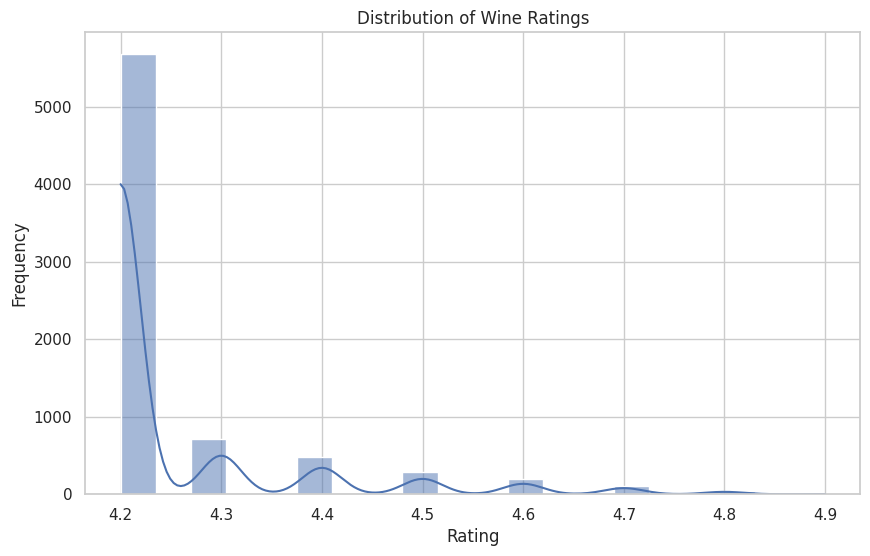

In [12]:
# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


This bar chart displays the count of different wine types in the dataset. It helps to understand the distribution of wine types.

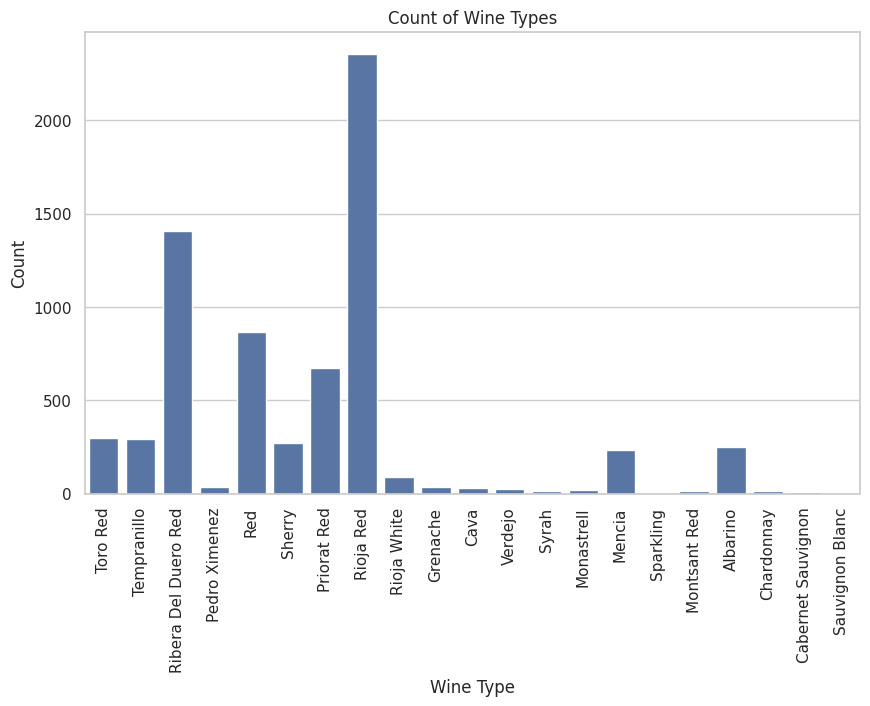

In [15]:
# Bar chart of wine types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type')
plt.title('Count of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Bivariate Analysis**
1. Scatter plots and correlation matrix for numerical features.
2. Box plots for numerical vs. categorical features.

This scatter plot shows the relationship between price and rating, with different colors for different wine types. It helps identify if higher-priced wines tend to have higher ratings.

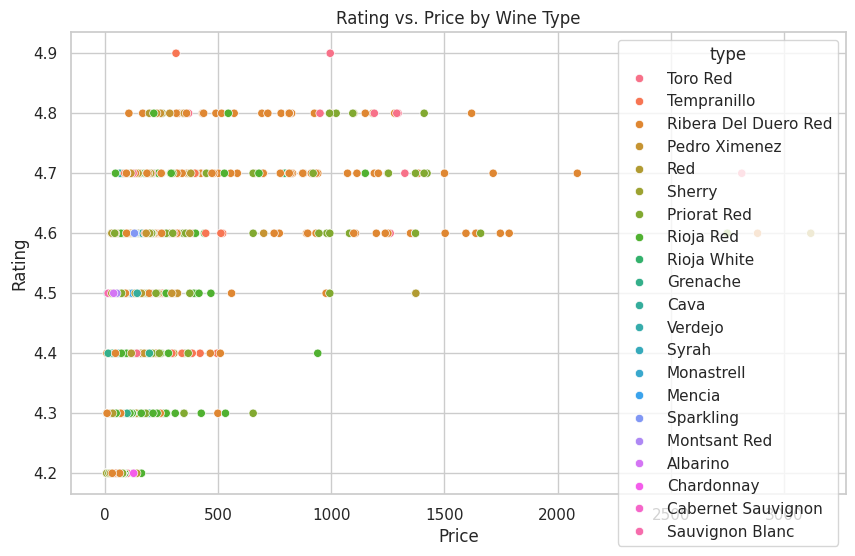

In [14]:
# Scatter plot of rating vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='rating', hue='type')
plt.title('Rating vs. Price by Wine Type')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


This box plot compares the distribution of ratings across different wine types. It highlights the median, quartiles, and potential outliers for each wine type.

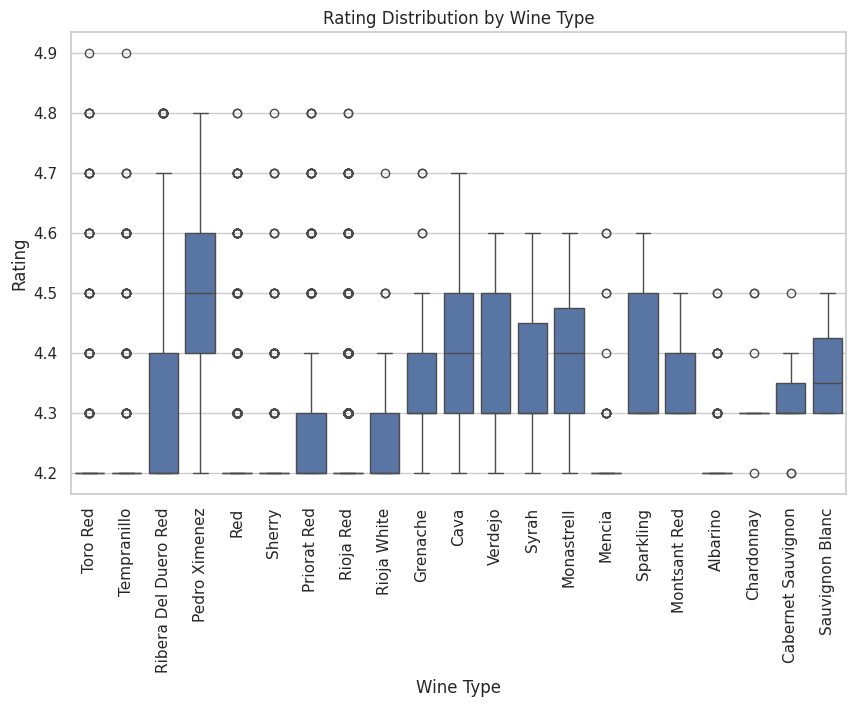

In [16]:
# Box plot of rating by wine type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='type', y='rating')
plt.title('Rating Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


**Multivariate Analysis**
1. Pair plots.

The pair plot provides a matrix of scatter plots for the numerical features (rating, price, body, acidity). It helps to observe the relationships between different pairs of features.

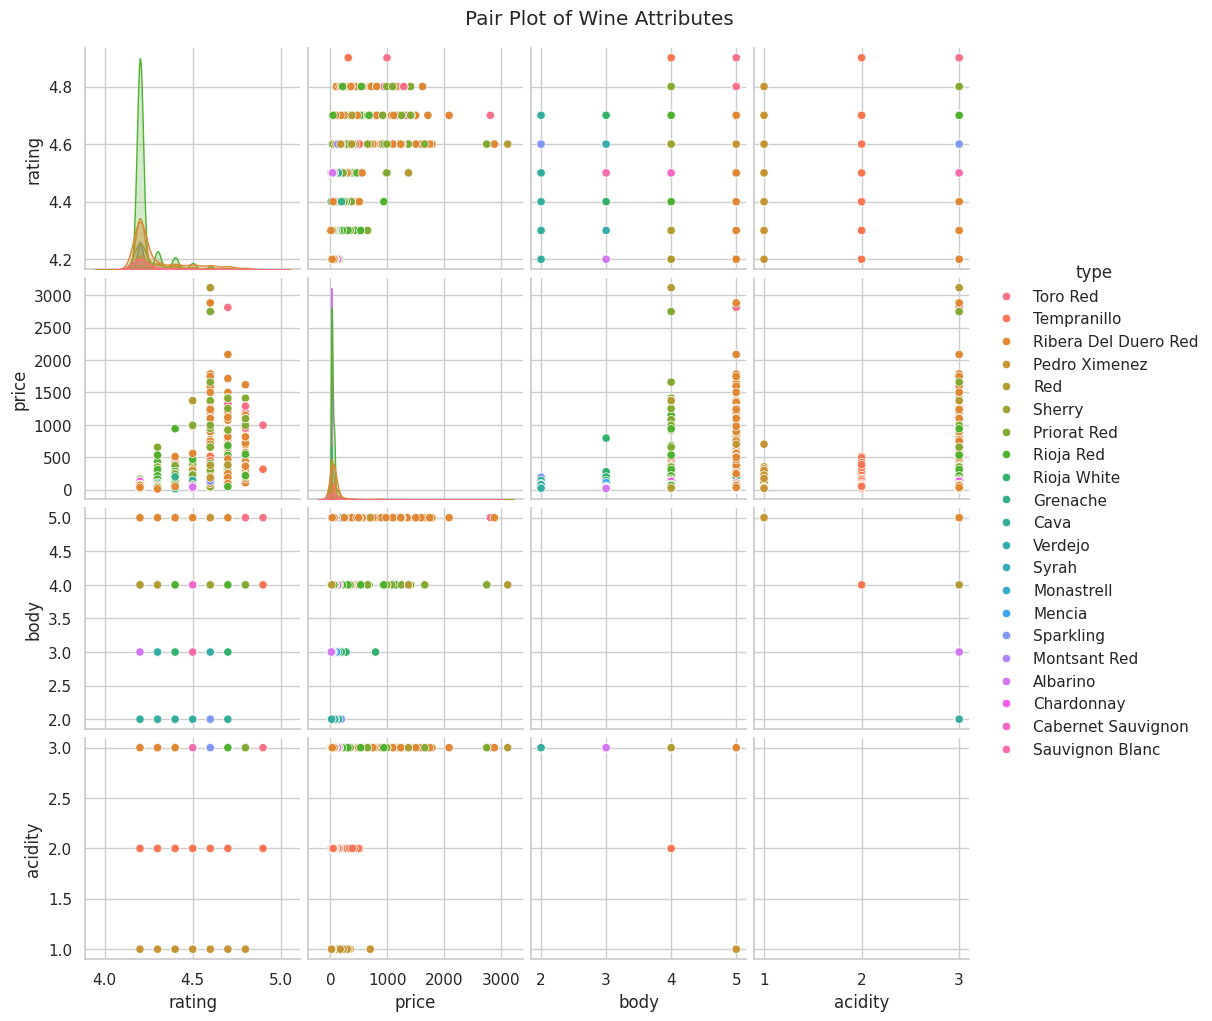

In [18]:
# Pair plot of selected features, including 'type'
sns.pairplot(data[['rating', 'price', 'body', 'acidity', 'type']], hue='type') # Include 'type' in the columns
plt.suptitle('Pair Plot of Wine Attributes', y=1.02)
plt.show()

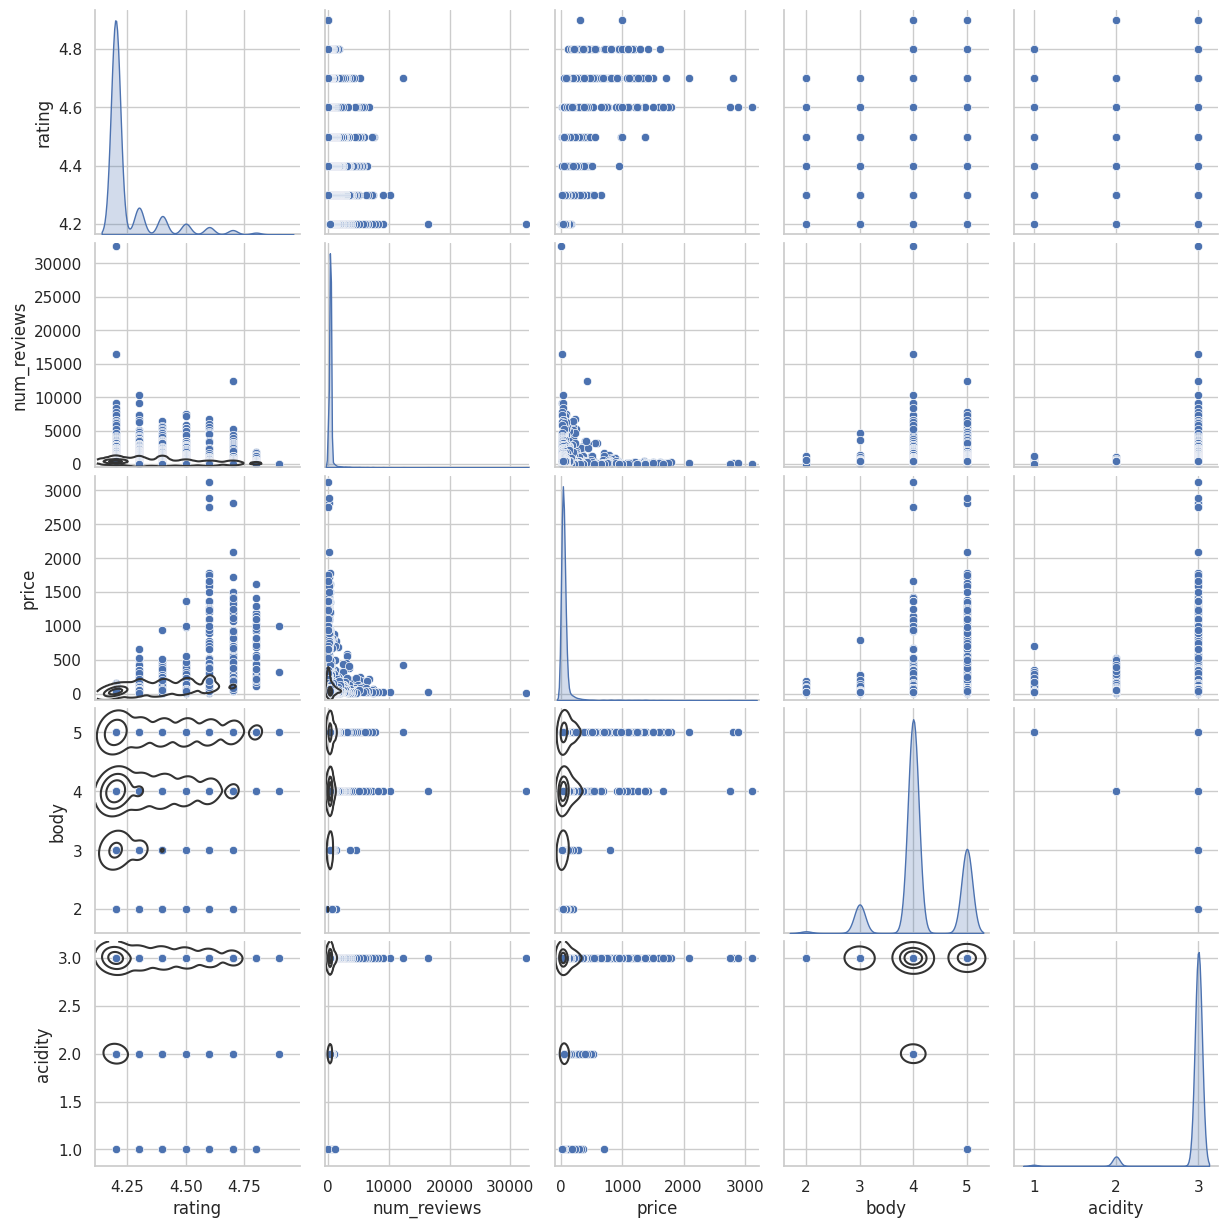

In [21]:
g = sns.pairplot(data=data, diag_kind="kde", dropna=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

<ipython-input-22-a00efdb4b1fe>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


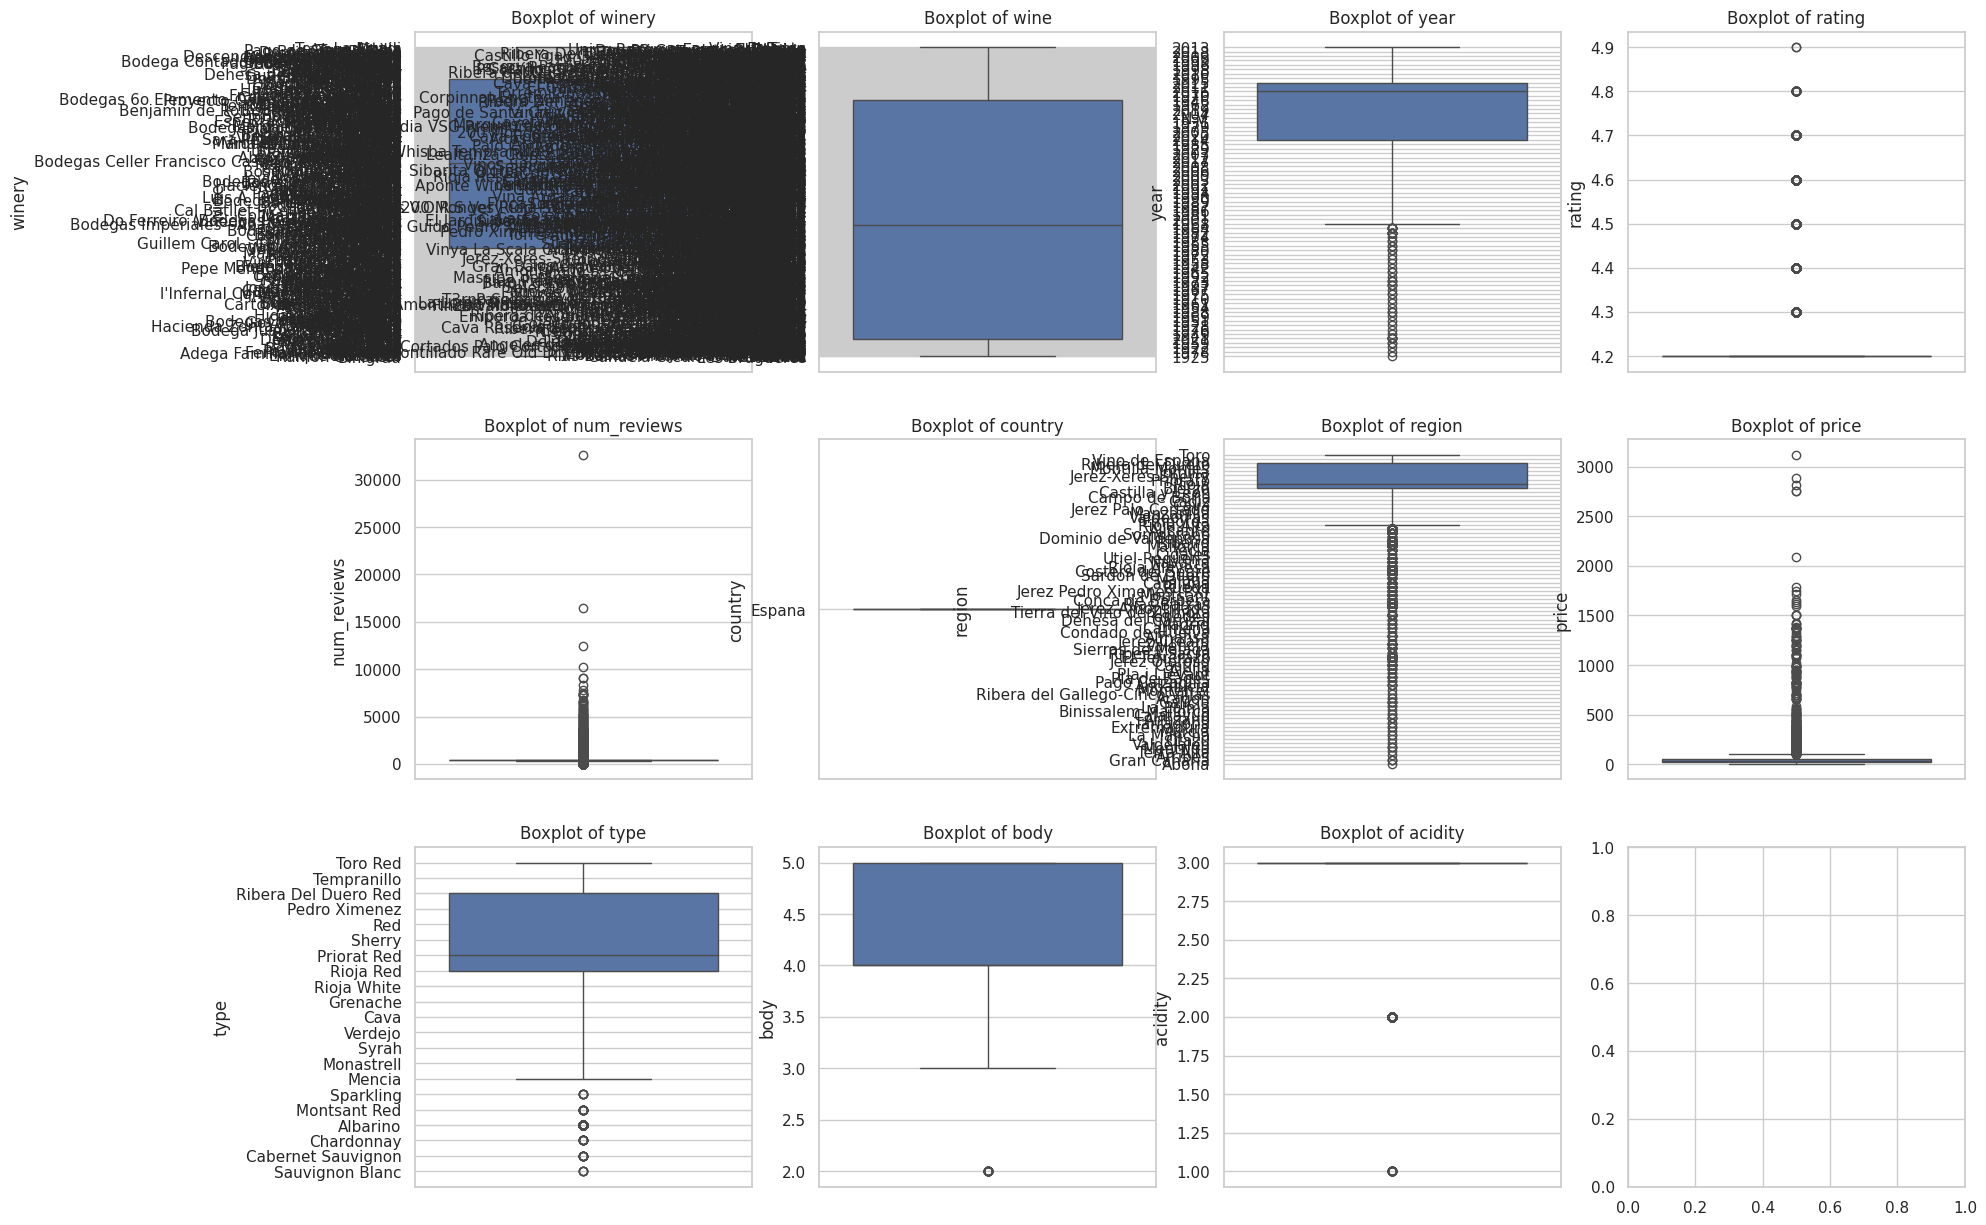

In [22]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for col in data.columns:
    if col != 'quality':
        sns.boxplot(y=col, data=data, ax=axs[index])
        axs[index].set_title(f'Boxplot of {col}')
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


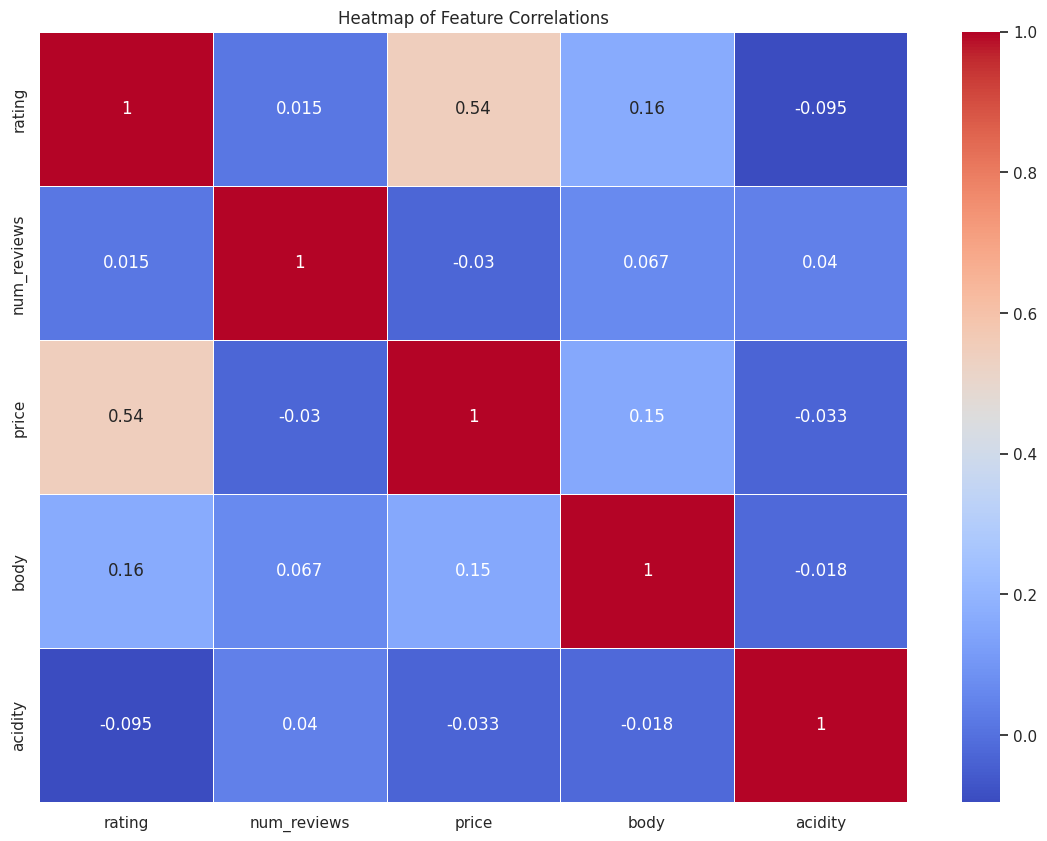

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()